In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from nanonets import Simulation

plt.style.use(["science","bright","grid"])

topo    = {"Nx": 1,"Ny": 1, "electrode_type": ['constant','constant']}
sim_c   = Simulation(topo)
ele_c   = sim_c.ELE_CHARGE_A_C
cap_t   = sim_c.get_capacitance_matrix()[0]
cap_g   = sim_c.self_capacitance_sphere(3.9,10.0)
cap_m   = sim_c.mutual_capacitance_adjacent_spheres(2.6,10.0,10.0,1.0)
def s_i_th(Ug, n):
    return ((n+0.5)*ele_c + cap_g*Ug)/(cap_t-cap_m)
def i_d_th(Ug, n):
    return ((0.5-n)*ele_c - cap_g*Ug)/(cap_m)

In [21]:
data = pd.read_csv("/mnt/c/Users/jonas/Desktop/phd/nanonets/scripts/1_funding_period/iv_curves/set/data/set_0.000_True.csv")

In [22]:
data

,E0,E1,G,Eq_Jumps,Jumps,Observable,Error
0,-0.5000,0.0,0.0,241732.0,1928459.0,-9.665642e+09,1.629564e+07
1,-0.4990,0.0,0.0,241093.0,1925453.0,-9.637954e+09,1.207415e+07
2,-0.4979,0.0,0.0,240088.0,1921334.0,-9.611613e+09,1.059886e+07
3,-0.4969,0.0,0.0,239484.0,1921292.0,-9.604806e+09,1.605212e+07
4,-0.4958,0.0,0.0,239262.0,1913885.0,-9.572938e+09,1.286470e+07
...,...,...,...,...,...,...,...
955,0.4958,0.0,0.0,238945.0,1911900.0,9.572228e+09,1.578493e+07
956,0.4969,0.0,0.0,239536.0,1916558.0,9.600012e+09,1.443432e+07
957,0.4979,0.0,0.0,239560.0,1922086.0,9.620929e+09,1.190694e+07
958,0.4990,0.0,0.0,240071.0,1927267.0,9.656630e+09,1.521790e+07


(100000000.0, 10000000000.0)

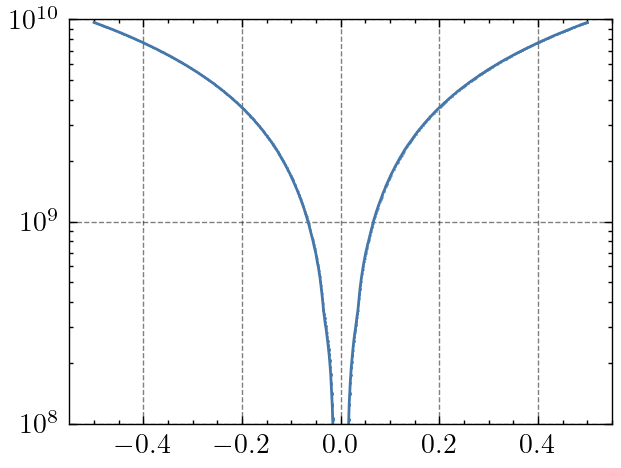

In [26]:
plt.figure(dpi=200)
# plt.plot(data['E0'].values, np.abs(data['Observable'].values))
plt.errorbar(x=data['E0'].values, y=np.abs(data['Observable'].values), yerr=data['Error'].values)
plt.yscale('log')
plt.ylim(1e8,1e10)

In [3]:
data1   = pd.read_csv("data/set_0.000_True.csv")
data2   = pd.read_csv("data/set_0.000_False.csv")
j       = data1['Jumps'].values
x1      = data1['E0'].values*1000
x2      = data2['E0'].values*1000
y1      = data1['Observable'].values*1e-6
y2      = data2['Observable'].values*1e-6
y1_e    = data1['Error'].values*1e-6
y2_e    = data1['Error'].values*1e-6
p1      = pd.read_csv("data/mean_state_set_0.000_True.csv").iloc[:,2].values
q1      = p1 * cap_t / sim_c.ELE_CHARGE_A_C
p2      = pd.read_csv("data/mean_state_set_0.000_False.csv").iloc[:,2].values
q2      = p2 * cap_t / sim_c.ELE_CHARGE_A_C

[-34.85380914]
[-11.61793638]
[11.61793638]
[34.85380914]


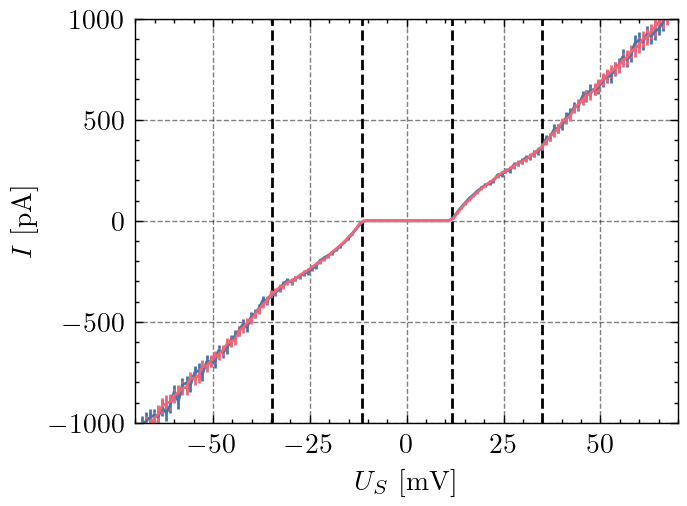

In [13]:
fig, ax = plt.subplots(dpi=200)
for i in range(-2,2):
    _   = plt.axvline(s_i_th(0,i)*1000, color='black', ls='--')
    print(s_i_th(0,i)*1000)
    # _   = plt.axvline(i_d_th(0,i)*1000, color='black', ls='--')
_   = ax.errorbar(x1, y1, y1_e)
_   = ax.errorbar(x2, y2, y2_e)
_   = ax.set_xlabel("$U_S$ [mV]")
_   = ax.set_ylabel("$I$ [pA]")
_   = ax.set_xlim(-70,70)
_   = ax.set_ylim(-1000,1000)

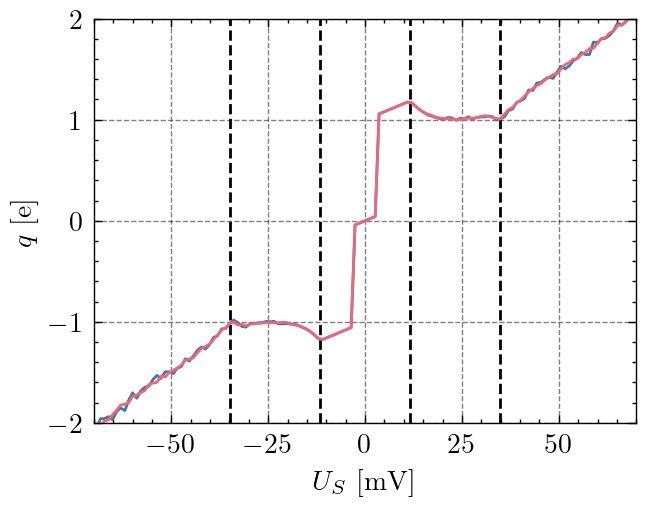

In [5]:
fig, ax = plt.subplots(dpi=200)
for i in range(-2,2):
    _ = plt.axvline(s_i_th(0,i)*1000, color='black', ls='--')
_   = ax.errorbar(x1, q1)
_   = ax.errorbar(x2, q2)
_   = ax.set_xlabel("$U_S$ [mV]")
_   = ax.set_ylabel("$q$ [e]")
_   = ax.set_xlim(-70,70)
_   = ax.set_ylim(-2,2)

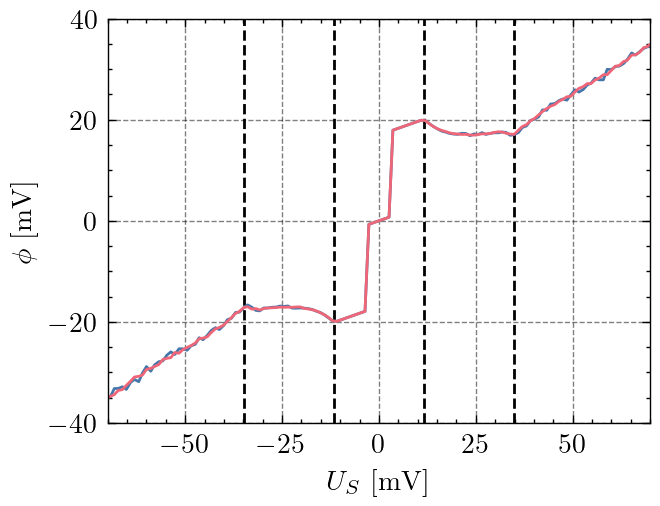

In [6]:
fig, ax = plt.subplots(dpi=200)
for i in range(-2,2):
    _   = plt.axvline(s_i_th(0,i)*1000, color='black', ls='--')
_   = ax.errorbar(x1, p1*1000)
_   = ax.errorbar(x2, p2*1000)
_   = ax.set_xlabel("$U_S$ [mV]")
_   = ax.set_ylabel("$\phi$ [mV]")
_   = ax.set_xlim(-70,70)
_   = ax.set_ylim(-40,40)